In [1]:
# !conda activate n2v
%load_ext autoreload
# from noise2gun import *
from compare import *

# Define and Load datasets
Must be ZARRs

## Define

In [2]:
# src_path = src = "/n/groups/htem/ESRF_id16a/tomo_ML/ReducedAnglesXray/jlr54_tests/volumes/mCTX_17keV_30nm_512c_first256/mCTX_17keV_30nm_512c_first256.zarr/volumes"
# gt_name = 'raw'
# ds_names = [NOT CYCLEGAN]
src_path = src = "/n/groups/htem/ESRF_id16a/tomo_ML/ResolutionEnhancement/jlr54_tests/volumes/GT/CBvBottomGT/CBxs_lobV_bottomp100um_training_0.n5"
ds_names=['volumes/raw_30nm','volumes/CycleGun_CBxFN90nmTile2_CBv30nmBottom100um_20220407SplitNoBottle_seed42_checkpoint340000_netG2_184tCrp']

## Load

In [3]:
comparator = Compare(src_path, # 'path/to/data.zarr/volumes'
                # gt_name=gt_name, # 'gt_dataset_name'
                ds_names=ds_names, # ['dataset_1_name', 'dataset_2_name', ...]
                out_path=None,
                batch_size=1,
                metric_list=None,
                vizualize=True,
                # make_mask=True
    )

                         CAREgun_mCTX30nm_450p_20210907  compare_mask  \
normalized_root_mse                            0.080435      0.993907   
peak_signal_noise_ratio                       25.931985      4.093949   
structural_similarity                          0.831098      0.006597   

                         kernSize3_depth2_450p  \
normalized_root_mse                   0.087373   
peak_signal_noise_ratio              25.213363   
structural_similarity                 0.826743   

                         noise2gun_mCTX30nm_450p_20210824      train  
normalized_root_mse                              0.138094   0.137160  
peak_signal_noise_ratio                         21.237362  21.296320  
structural_similarity                            0.760433   0.753516  


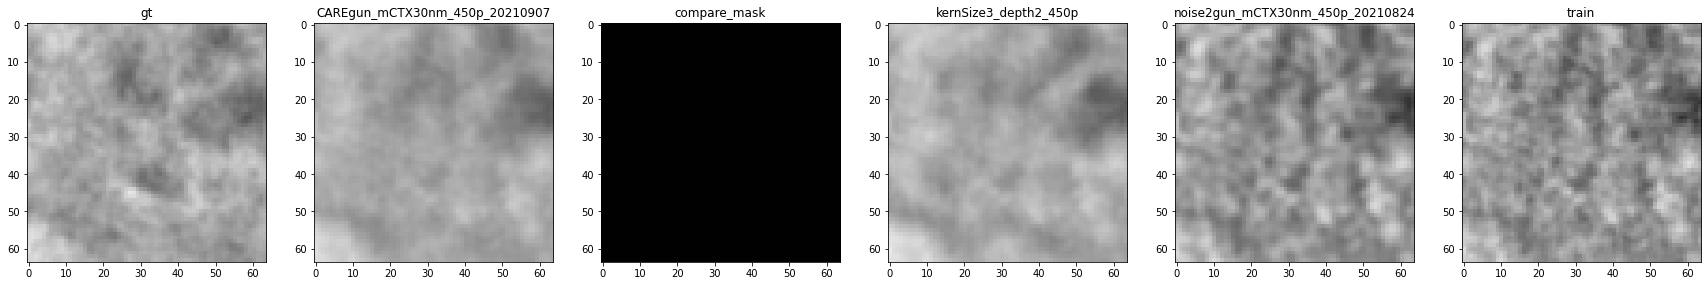

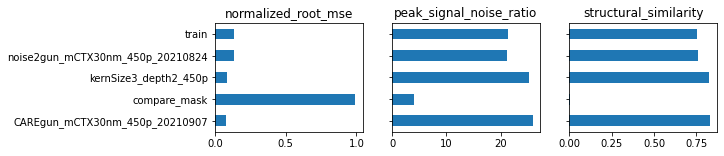

In [4]:
batch = comparator.patch_compare()

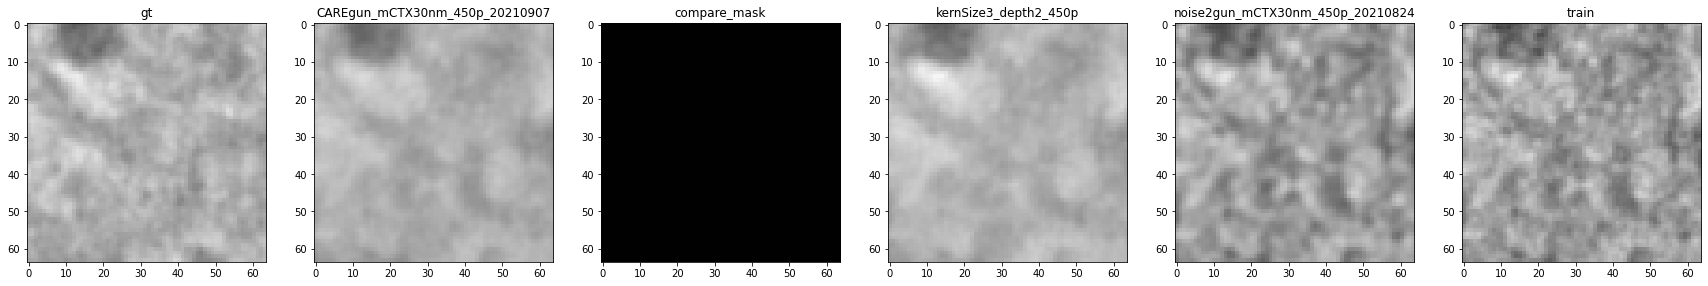

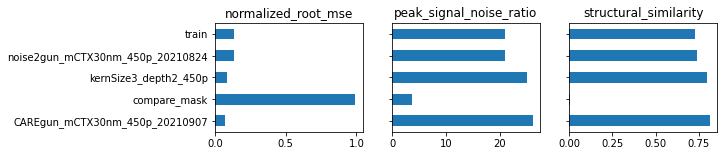

In [7]:
comparator.batch_show()

INFO:gunpowder.nodes.scan:scanning over 147 chunks
147it [01:23,  1.75it/s]


                         CAREgun_mCTX30nm_450p_20210907  compare_mask  \
normalized_root_mse                            0.071387      0.994347   
peak_signal_noise_ratio                       26.315237      3.325937   
structural_similarity                          0.815099      0.006675   

                         kernSize3_depth2_450p  \
normalized_root_mse                   0.081033   
peak_signal_noise_ratio              25.181159   
structural_similarity                 0.807781   

                         noise2gun_mCTX30nm_450p_20210824      train  
normalized_root_mse                              0.136598   0.135489  
peak_signal_noise_ratio                         20.570633  20.641722  
structural_similarity                            0.732273   0.725682  


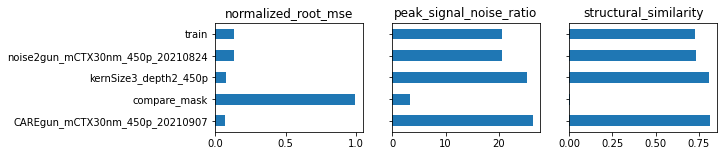

In [5]:
results = comparator.compare()

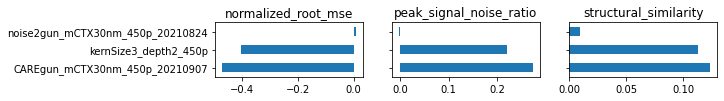

In [17]:
norm_results = results.divide(results.train, axis='rows').drop(['compare_mask', 'train'], axis=1) - 1
comparator.plot_results(norm_results)

In [2]:
import zarr
import daisy

In [10]:
n2g = Noise2Gun('', gp.Coordinate((30,30,30)), side_length=34)
pad = (n2g.context_side_length - n2g.side_length) // 2

for array, specs in comparator.source.array_specs.items():
    ds = comparator.source.datasets[array]
    d = daisy.open_ds(src_path.rstrip('/volumes'), 'volumes/'+ds)
    crop = gp.Coordinate(pad * d.voxel_size)
    spec = specs
    roi = gp.Roi(d.roi.get_offset(), d.roi.get_shape())
    spec.roi = roi.grow(-crop, -crop)
    spec.voxel_size = d.voxel_size
    spec.dtype = d.dtype
    comparator.source.array_specs[array] = spec

In [15]:
for array, specs in comparator.source.array_specs.items():
    print(array)
    print(specs.roi)

GT
None
CAREGUN_MCTX30NM_450P_20210907
None
KERNSIZE3_DEPTH2_450P
None
NOISE2GUN_MCTX30NM_450P_20210824
None
TRAIN
None
COMPARE_MASK
None


In [14]:
# comparator.ds_names.append(comparator.mask_name)
comparator.make_pipes()

In [41]:
comparator.source.datasets

{GT: 'gt',
 CAREGUN_MCTX30NM_450P_20210907: 'CAREgun_mCTX30nm_450p_20210907',
 KERNSIZE3_DEPTH2_450P: 'kernSize3_depth2_450p',
 NOISE2GUN_MCTX30NM_450P_20210824: 'noise2gun_mCTX30nm_450p_20210824',
 TRAIN: 'train'}

In [9]:
z = zarr.open(src_path)
z['compare_mask'].info
# z['gt'].info

Name,/compare_mask
Type,zarr.core.Array
Data type,uint8
Shape,"(164, 420, 420)"
Chunk shape,"(41, 105, 210)"
Order,C
Read-only,False
Compressor,Zlib(level=3)
Store type,zarr.storage.DirectoryStore
No. bytes,28929600 (27.6M)
No. bytes stored,127332 (124.3K)
